
# Human In the Loop Demo

---

Learn to use Amazon SageMaker for creating, tuning, and deploying a machine learning (ML) model for predicting customer churn of a mobile phone service provider.

## Modules

1. [Prepare a dataset for training](#Prepare-a-dataset-for-training)
2. [Train and evaluate a model](#Train-and-evaluate-a-model)
3. [Automatically tune the model](#Automatically-tune-the-model)
4. [Make the model production ready](#Make-the-model-production-ready)
5. [AWS Auto Scaling](#AWS-Auto-Scaling)
6. [Relative cost of errors](#Relative-cost-of-errors)
  
---

# Prepare a dataset for training

### Churn prediction problem

Losing customers is costly for any business.  Identifying unhappy customers early gives you a chance to offer them incentives to stay.  You will use ML to automate the identification of unhappy customers, also known as *customer churn prediction*. 

ML models rarely give perfect predictions, so you will learn how to adjust for prediction mistakes in your total ML costs.

The example of churn that may be familiar to you; leaving a mobile phone service provider for a competitor.  If a provider is aware that a particular customer is considering leaving, it can offer timely incentives, perhaps in the form of a phone upgrade, to encourage the customer to continue service.  

Incentives are often more cost-effective than losing and reacquiring a customer.

### Dataset

Mobile phone service providers keep historical records on customers who churn bit ultimately continue using the service. You can use this data to construct an ML model of one mobile phone provider's churn using a process called *training*. 

You'll train the model, can pass the profile information of an arbitrary customer to the model, and have the model predict whether this customer is going to churn. The model will make mistakes&mdash;predicting the future is tricky. However, you will learn how to manage prediction errors.

The dataset used is publicly available and is mentioned in the book [*Discovering Knowledge in Data*](https://www.amazon.com/dp/0470908742/) by Daniel T. Larose. The author attributed the dataset to the University of California Irvine Repository of Machine Learning Datasets.

As part of the lab setup, the relevant dataset, churn.txt has been downloaded and made available for this exercise.

In [1]:
!head './churn.txt'

State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
PA,163,806,403-2562,no,yes,300,8.1622040217391,3,7.579173703343681,3.9330349941938625,4,6.508638877091394,4.065759457683862,100,5.1116239145545554,4.9281602056057885,6,5.673203040696216,3,True.
SC,15,836,158-8416,yes,no,0,10.018992664834252,4,4.226288822198435,2.3250045529370977,0,9.97259241534841,7.141039871521733,200,6.436187619334115,3.2217476231887012,6,2.559749162329034,8,False.
MO,131,777,896-6253,no,yes,300,4.708489916519045,3,4.768159882372771,4.53746627560553,3,4.566714501754875,5.363234681368032,100,5.142450865432122,7.139023052596313,2,6.254156588270942,4,False.
WY,75,878,817-5729,yes,yes,700,1.2687337723540173,3,2.567641585633793,2.528747882267883,5,2.3336236298897663,3.773585578112562,450,3.8144134221879837,2.245779327608127,6,1.0806920414898902,6,False

The above looks like a CSV file with a header row. 

You will use the pandas library for loading and displaying this raw dataset. 

The resulting `churn` variable is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
churn = pd.read_csv('./churn.txt')
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,...,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,True.
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,...,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,False.
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,...,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,False.
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,...,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,False.
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,...,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NH,4,787,151-3162,yes,yes,800,10.862632,5,7.250969,...,1,8.026482,4.921314,350,6.748489,4.872570,8,2.122530,9,False.
4996,SD,140,836,351-5993,no,no,0,1.581127,8,3.758307,...,7,1.328827,0.939932,300,4.522661,6.938571,2,4.600473,4,False.
4997,SC,32,836,370-3127,no,yes,700,0.163836,5,4.243980,...,3,2.340554,0.939469,450,5.157898,4.388328,7,1.060340,6,False.
4998,MA,142,776,604-2108,yes,yes,600,2.034454,5,3.014859,...,3,3.470372,6.076043,150,4.362780,7.173376,3,4.871900,7,True.


Let's take a closer look. By modern standards, it’s a relatively small dataset with only 3,333 records. 

Each record uses 21 attributes to describe the profile of a customer of an unknown US mobile phone service provider. 

The attributes are:

- `State`: The US state in which the customer resides indicated by a two-letter abbreviation. For example, OH or NJ
- `Account Length`: The number of days that this account has been active
- `Area Code`: The three-digit area code of the corresponding customer’s phone number
- `Phone`: The seven-digit phone number
- `Int’l Plan`: Whether the customer has an international calling plan: yes/no
- `VMail Plan`: Whether the customer has a voice mail feature: yes/no
- `VMail Message`: The average number of voice mail messages per month
- `Day Mins`: The total number of calling minutes used during the day
- `Day Calls`: The total number of calls placed during the day
- `Day Charge`: The billed cost of daytime calls
- `Eve Mins, Eve Calls, Eve Charge`: The billed cost for calls placed during the evening
- `Night Mins`, `Night Calls`, `Night Charge`: The billed cost for calls placed during nighttime
- `Intl Mins`, `Intl Calls`, `Intl Charge`: The billed cost for international calls
- `CustServ Calls`: The number of calls placed to Customer Service
- `Churn?`: Whether the customer left the service: true/false

The last attribute, `Churn?`, is known as the *target attribute*&mdash;the attribute that we want the ML model to predict.  Because the target attribute is binary, our model will be performing binary prediction, also known as *binary classification*.

Now, you will explore and visualize the data and the relationships between attributes.

We've already used pandas.  We also recommend using the numpy and/or matplotlib libraries.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

The first step is to use a histogram to see how the values of individual attributes are distributed, as well as compute summary statistics for numeric attributes such as mean, min values, max values, standard deviations, etc. 

For categorical variables we need to see frequency tables. 

While there are several ways to do this in Python&mdash;we are going to use the following pandas functions:[`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist),[`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe),[`crosstab()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html), and[`select_dtypes()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html). 

To show the histograms right in the Jupyter notebook, we will also use the[`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) magic function of IPython.

col_0,% observations
State,
AK,0.0170
AL,0.0200
AR,0.0220
AZ,0.0180
CA,0.0208
CO,0.0182
CT,0.0178
DC,0.0224
DE,0.0182


# of unique values 51


col_0,% observations
Phone,
100-2030,0.0002
100-2118,0.0002
100-3505,0.0002
100-5224,0.0002
101-3371,0.0002
...,...
999-3178,0.0002
999-5498,0.0002
999-5816,0.0002


# of unique values 4999


col_0,% observations
Int'l Plan,
no,0.5014
yes,0.4986


# of unique values 2


col_0,% observations
VMail Plan,
no,0.4976
yes,0.5024


# of unique values 2


col_0,% observations
Churn?,
False.,0.5004
True.,0.4996


# of unique values 2


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,101.675800,773.791400,226.680000,5.518757,3.50460,5.018902,5.026199,3.140400,5.017557,4.000917,224.790000,5.023490,5.025876,5.475400,4.328242,5.525800
std,57.596762,63.470888,273.998527,3.433485,1.68812,2.195759,2.135487,2.525621,2.127857,1.631001,97.302875,1.748900,1.019302,1.877045,2.440311,2.041217
min,1.000000,657.000000,0.000000,0.000215,0.00000,0.004777,0.004659,0.000000,0.013573,0.008468,0.000000,0.054863,1.648514,0.000000,0.000769,0.000000
25%,52.000000,736.000000,0.000000,2.682384,2.00000,3.470151,3.588466,1.000000,3.529613,2.921998,150.000000,3.873157,4.349726,4.000000,2.468225,4.000000
50%,102.000000,778.000000,0.000000,5.336245,3.00000,4.988291,5.145656,3.000000,5.006860,3.962089,200.000000,5.169154,5.034905,5.000000,4.214058,6.000000
75%,151.000000,806.000000,400.000000,7.936151,5.00000,6.559750,6.552962,5.000000,6.491725,5.100128,300.000000,6.272015,5.716386,7.000000,5.960654,7.000000
max,200.000000,878.000000,1300.000000,16.897529,10.00000,12.731936,13.622097,14.000000,12.352871,10.183378,550.000000,10.407778,8.405644,12.000000,14.212261,13.000000


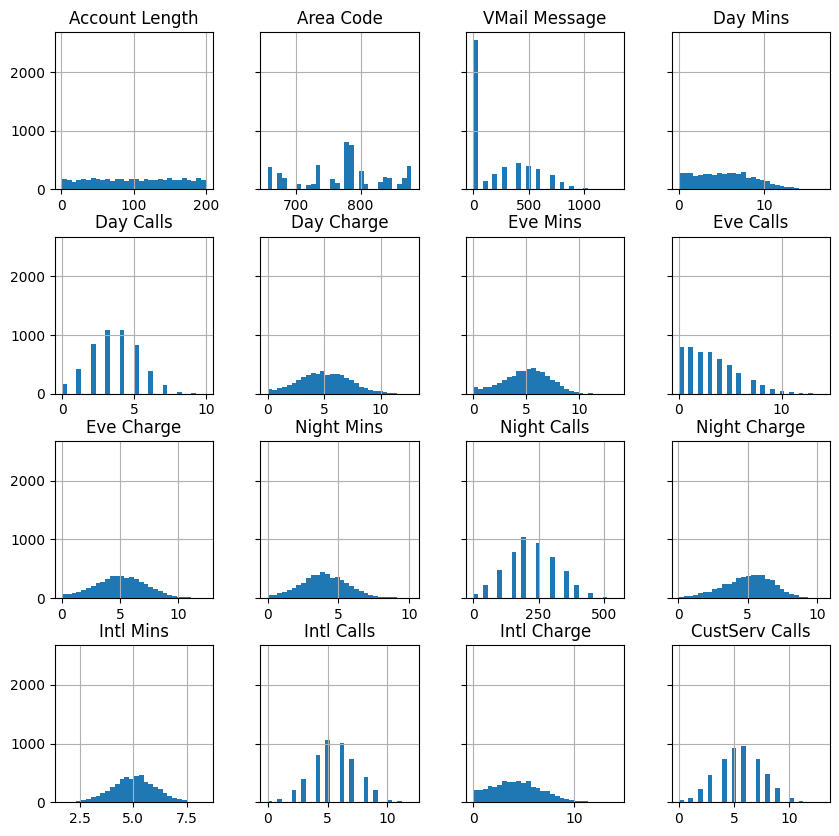

In [5]:
# show frequency tables for each categorical feature and counts of unique values
for column in churn.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=churn[column],
                        columns='% observations', 
                        normalize='columns'))
    print("# of unique values {}".format(churn[column].nunique()))

# show summary statistics
display(churn.describe())

# build histograms for each numeric feature
%matplotlib inline
hist = churn.hist(bins=30, sharey=True, figsize=(10, 10))

We can see immediately that:
* `State` appears to be quite evenly distributed
* `Phone` takes on too many unique values to be of any practical use.  It's possible that parsing out the prefix could have some value, but unless you have more context on how these are allocated, avoid using it.
* Only 14% of customers churned, so there is some class imbalance, but nothing extreme.
* Most of the numeric features are surprisingly well distributed, with many showing bell-like gaussianity.  `VMail Message` being a notable exception (and `Area Code` showing up as a feature we should convert to non-numeric).




Now that we've shown how to do the first part of the exercise, it's time for you to complete the second part by looking at how each feature relates to our target variable `Churn?`. 

You can accomplish this using the same pandas functions of `crosstab()`and`hist()`by entering the code in the cell below.


Churn?,False.,True.
State,,
AK,0.015588,0.018415
AL,0.021583,0.018415
AR,0.022782,0.021217
AZ,0.015588,0.020416
CA,0.020384,0.021217
CO,0.018785,0.017614
CT,0.015588,0.020016
DC,0.022382,0.022418
DE,0.018385,0.018014


Churn?,False.,True.
Phone,,
100-2030,0.0000,0.0004
100-2118,0.0004,0.0000
100-3505,0.0004,0.0000
100-5224,0.0000,0.0004
101-3371,0.0004,0.0000
...,...,...
999-3178,0.0004,0.0000
999-5498,0.0000,0.0004
999-5816,0.0004,0.0000


Churn?,False.,True.
Int'l Plan,,
no,0.5,0.502802
yes,0.5,0.497198


Churn?,False.,True.
VMail Plan,,
no,0.496403,0.498799
yes,0.503597,0.501201


Account Length


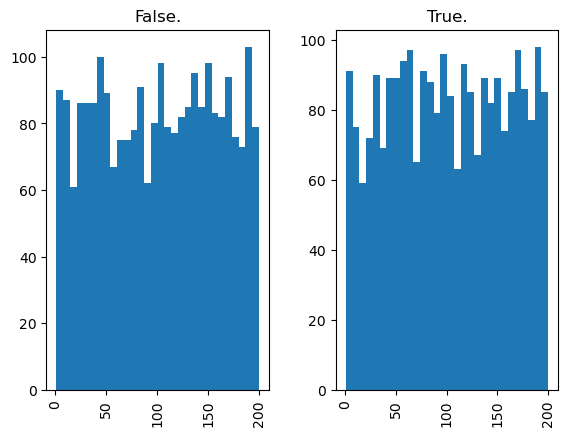

Area Code


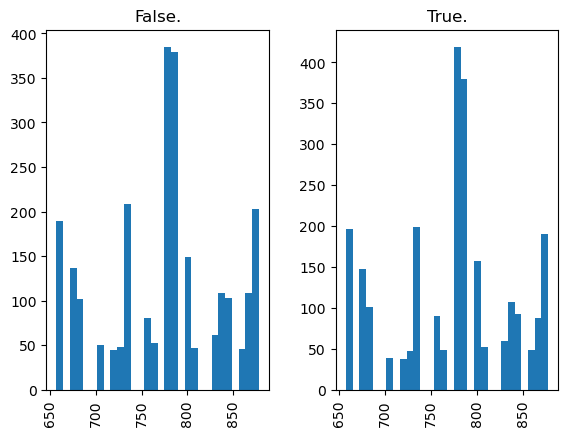

VMail Message


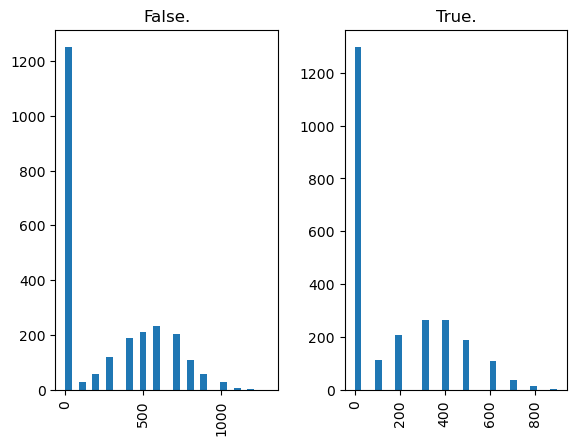

Day Mins


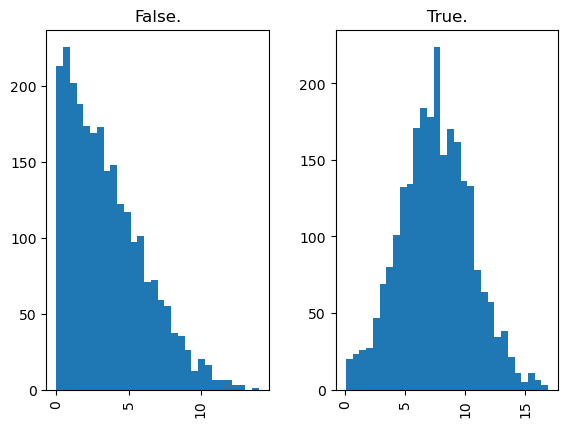

Day Calls


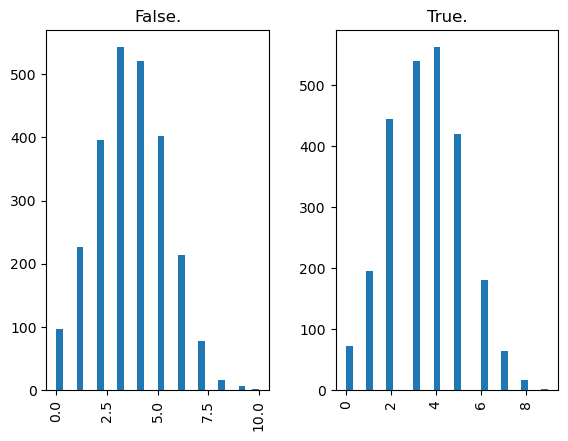

Day Charge


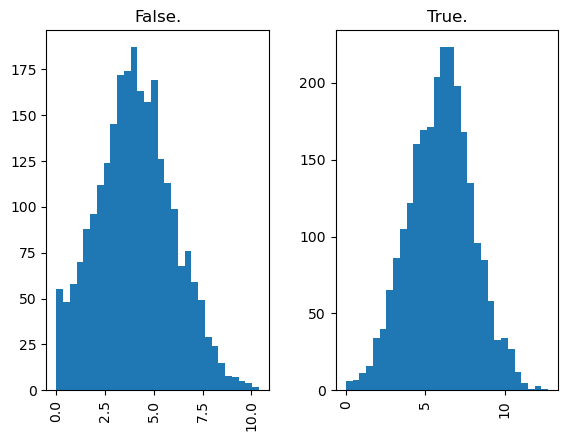

Eve Mins


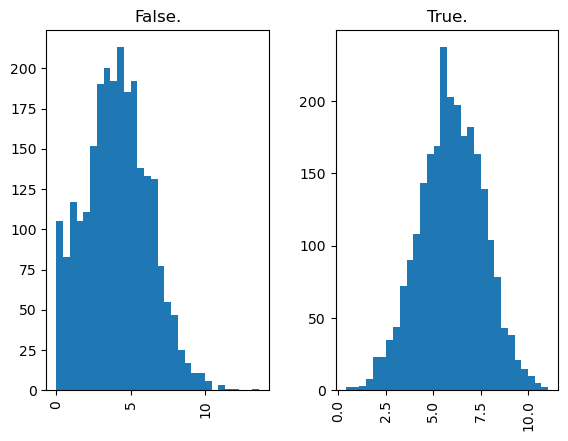

Eve Calls


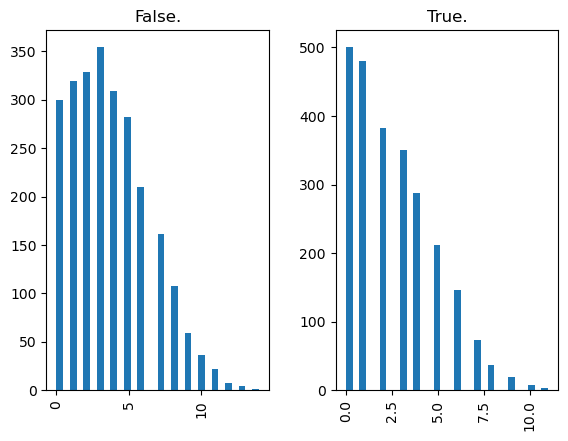

Eve Charge


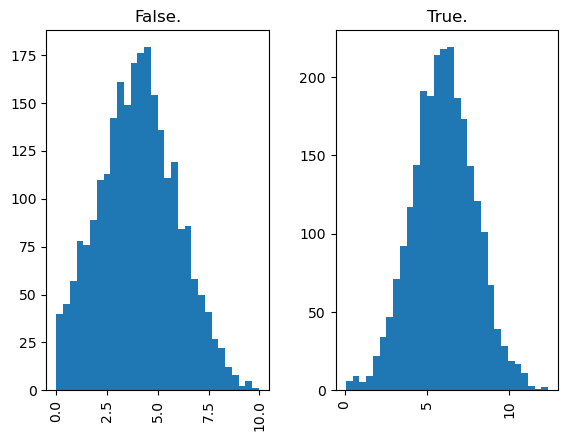

Night Mins


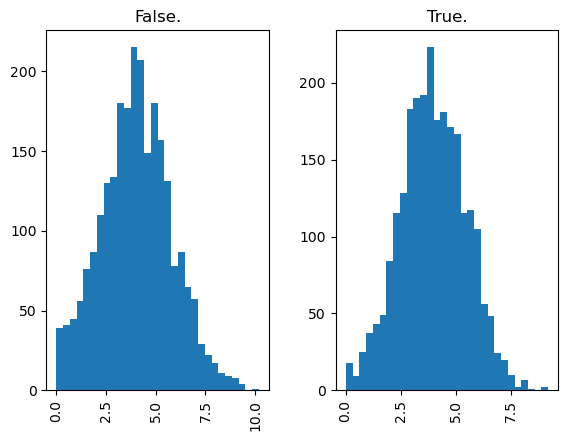

Night Calls


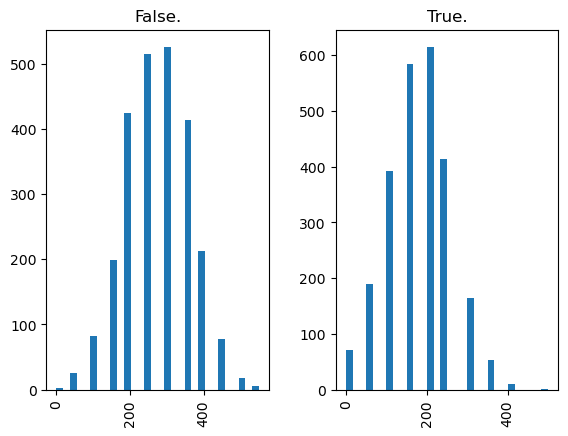

Night Charge


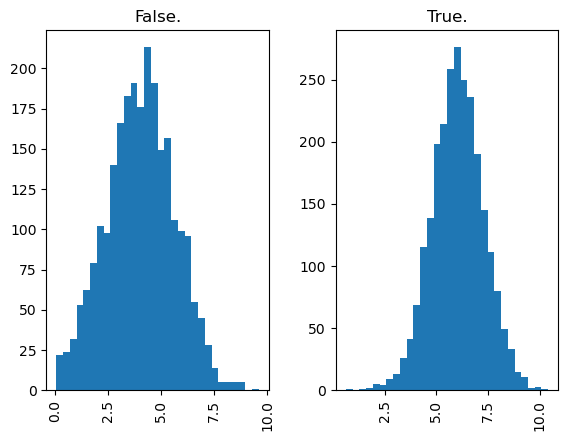

Intl Mins


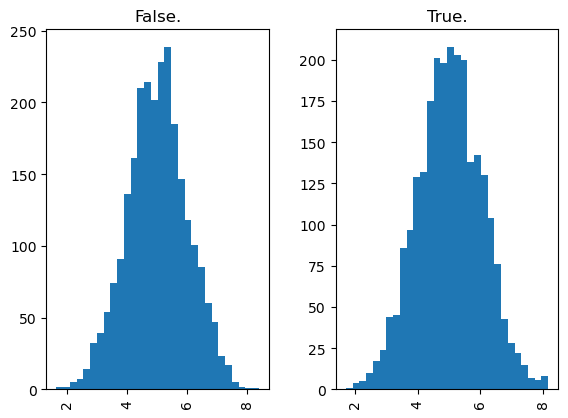

Intl Calls


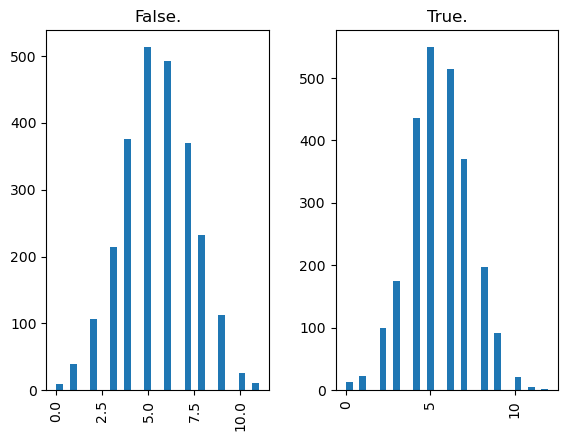

Intl Charge


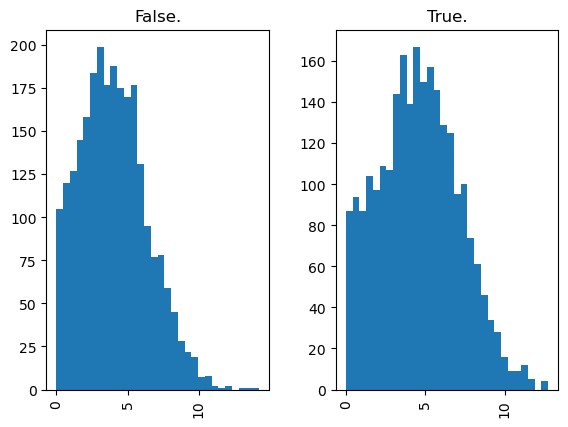

CustServ Calls


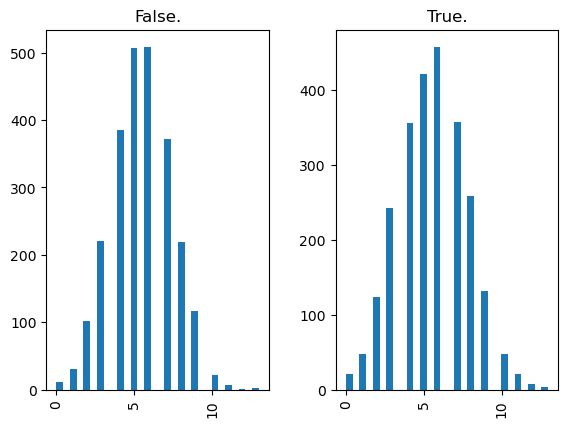

In [7]:
## Your solution goes here... 
for column in churn.select_dtypes(include=['object']).columns:
    if column != 'Churn?':
        display(pd.crosstab(
            index=churn[column], columns=churn['Churn?'], normalize='columns'))

for column in churn.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = churn[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()


Depending on your analysis, your solution might show different results, but you should see that churners appear:
* Fairly evenly distributed geographically
* More likely to have an international plan
* Less likely to have a voicemail plan
* Exhibit some bimodality in daily minutes (either higher or lower than the average for non-churners)
* Larger number of customer service calls (which makes sense as we'd expect customers who experience lots of problems may be more likely to churn)

In addition, we see that churners take on very similar distributions for features like`Day Mins`and`Day Charge`.  

That's not surprising; you would expect minutes spent talking to correlate with charges.



Examine the pairwise relationships between attributes to see how they are correlated. Use the pandas functions [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) and [scatter_matrix()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html) pandas functions to achieve this. 

Enter your solution in the cell below. 

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.037483,-0.009030,-0.015878,0.011659,-0.007468,0.000213,0.026515,-0.012795,0.016400,-0.002383,-0.034925,0.017277,-0.003735,0.028285,-0.036721
Area Code,-0.037483,1.000000,-0.017609,-0.013293,0.013661,-0.007918,-0.012286,-0.012009,-0.008404,-0.009595,-0.002023,0.000171,0.023347,-0.013822,-0.010524,0.014697
VMail Message,-0.009030,-0.017609,1.000000,-0.143272,0.002762,-0.182712,-0.104667,-0.101240,-0.029212,0.061370,0.135042,-0.155475,-0.015162,0.131964,0.010120,0.068657
Day Mins,-0.015878,-0.013293,-0.143272,1.000000,-0.087598,0.667941,0.482641,-0.184939,0.766489,0.188190,-0.445212,0.570508,0.001988,0.236131,0.239331,-0.195322
Day Calls,0.011659,0.013661,0.002762,-0.087598,1.000000,-0.222556,0.033903,0.185881,-0.052051,-0.085222,-0.083050,0.046641,-0.022548,-0.045671,-0.120064,-0.065518
Day Charge,-0.007468,-0.007918,-0.182712,0.667941,-0.222556,1.000000,0.574697,0.236626,0.371580,0.150700,-0.130722,0.374861,0.010294,0.119584,0.251748,-0.260945
Eve Mins,0.000213,-0.012286,-0.104667,0.482641,0.033903,0.574697,1.000000,-0.067123,0.269980,-0.090515,0.067315,0.317481,-0.015678,0.070456,0.448910,-0.167347
Eve Calls,0.026515,-0.012009,-0.101240,-0.184939,0.185881,0.236626,-0.067123,1.000000,-0.467814,0.221439,0.218149,-0.324936,-0.001593,-0.112062,0.017036,-0.433467
Eve Charge,-0.012795,-0.008404,-0.029212,0.766489,-0.052051,0.371580,0.269980,-0.467814,1.000000,0.184230,-0.454649,0.546137,-0.003569,0.164104,0.243936,-0.011019
Night Mins,0.016400,-0.009595,0.061370,0.188190,-0.085222,0.150700,-0.090515,0.221439,0.184230,1.000000,-0.223023,-0.140482,-0.012781,0.038831,0.271179,-0.332802


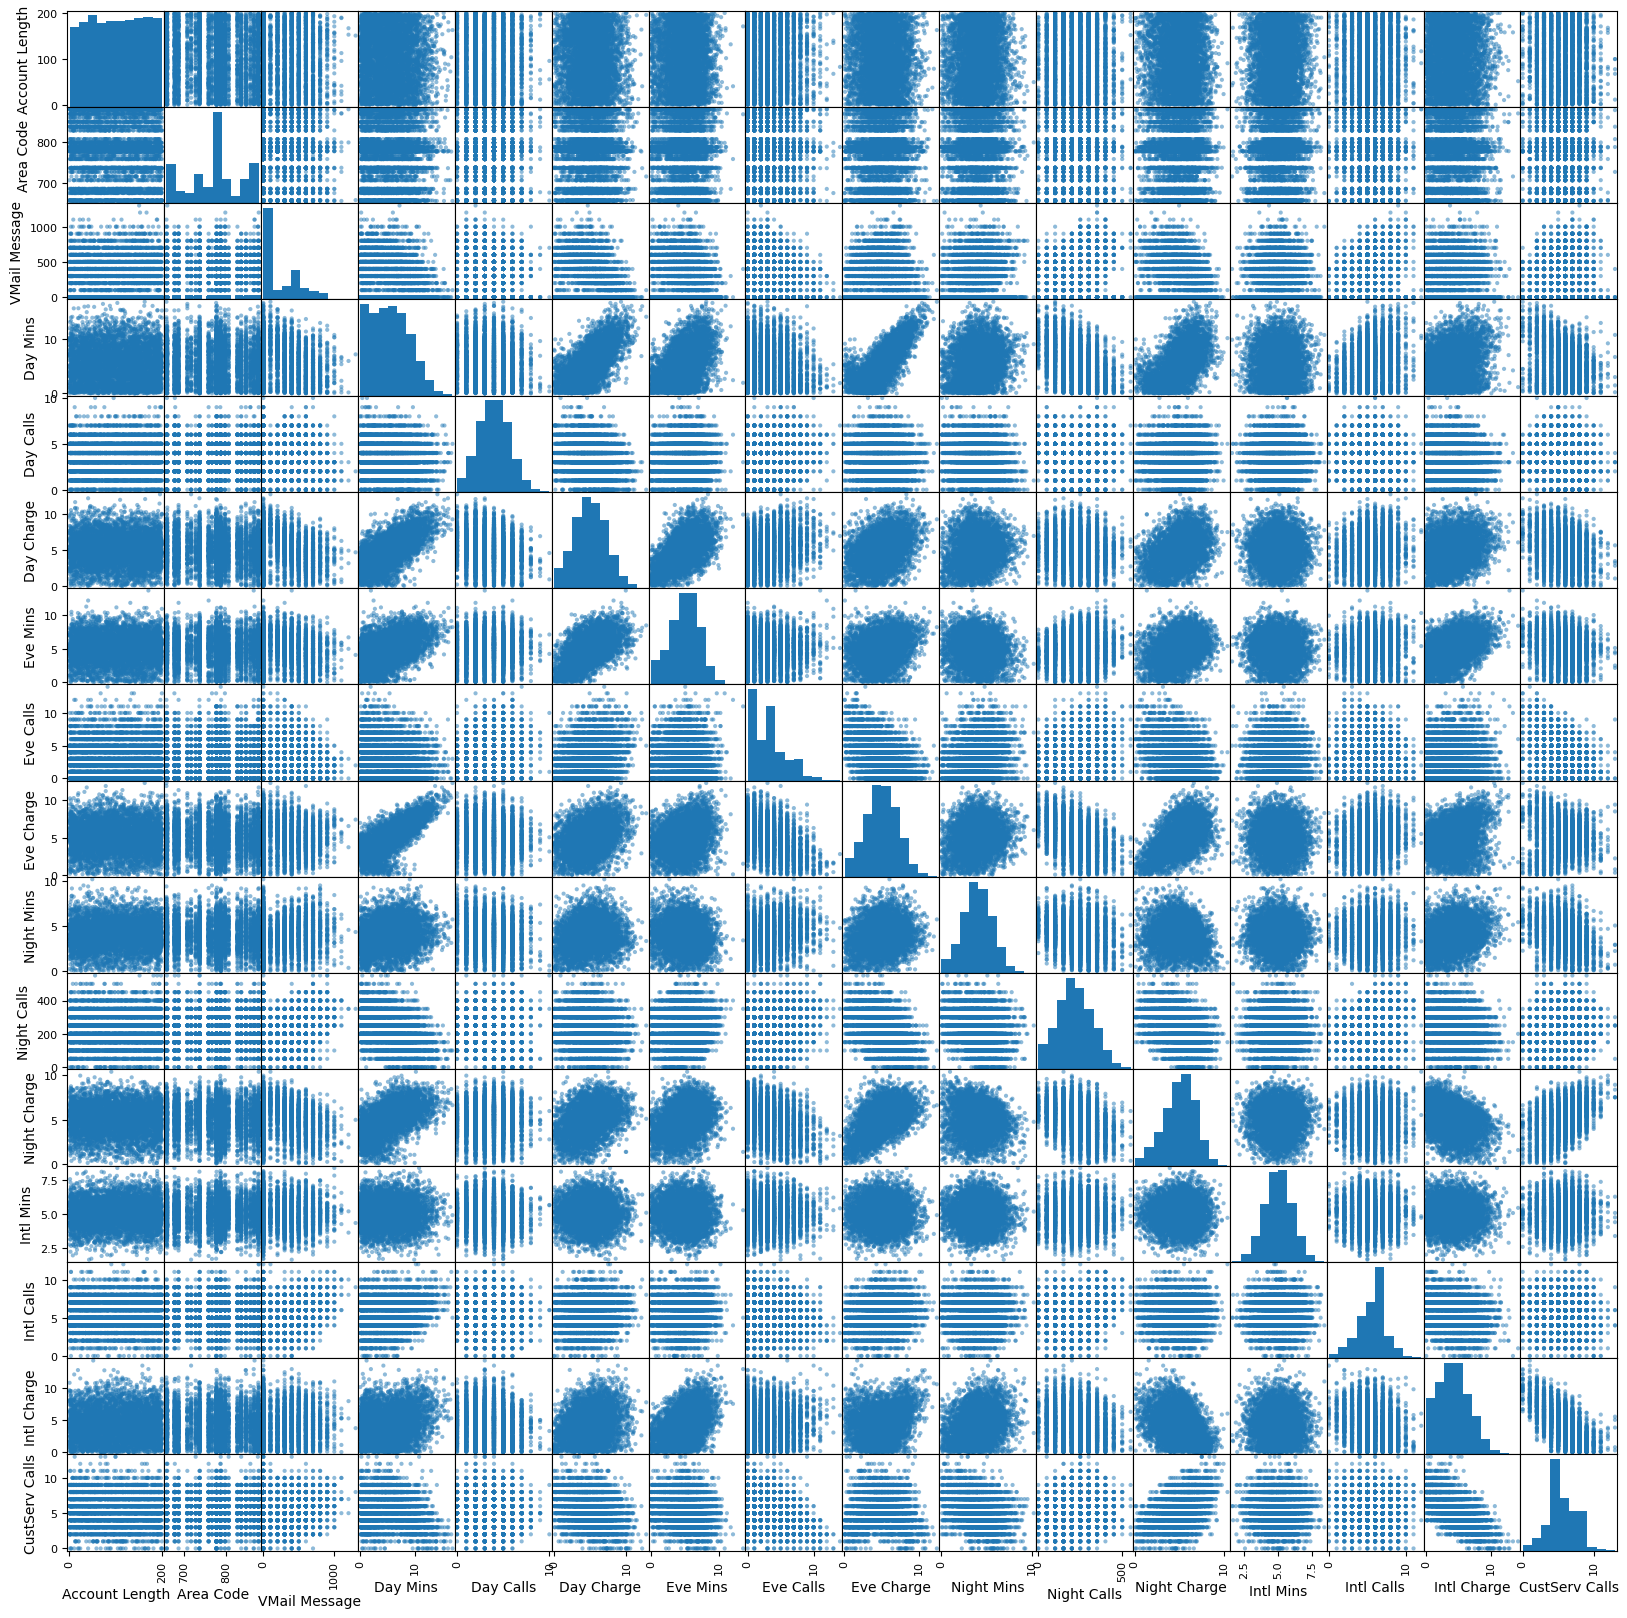

In [7]:
## Your solution goes here... 
#display(churn.corr())
#pd.plotting.scatter_matrix(churn, figsize=(20, 20))
#plt.show()

display(churn.corr(numeric_only=True))
pd.plotting.scatter_matrix(churn.select_dtypes(include=[np.number]), figsize=(20, 20))
plt.show()


You should see several features that essentially have 100 percent correlation with one another.  Including these feature pairs in some machine learning algorithms can create catastrophic problems, while in others it will only introduce minor redundancy and bias.

In preparation for model training, first remove the columns that observed as useless for our purposes. 

Remove the`Phone`and`Area Code`attributes:

In [8]:
churn = churn.drop(['Phone', 'Area Code'], axis=1)

Next, remove one feature from each of the highly correlated pairs: 

* `Day Charge` from the pair with `Day Mins`
* `Eve Charge` from the pair with `Eve Mins`
* `Night Charge` from the pair with `Night Mins`
* `Intl Charge` from the pair with `Intl Mins`

In [9]:
churn = churn.drop(['Day Charge', 'Eve Charge',
                    'Night Charge', 'Intl Charge'], axis=1)

Now that we have done all of the changes to the data, let's have a last look into how the data looks like before moving to training. 

In [10]:
churn.head()

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,PA,163,no,yes,300,8.162204,3,3.933035,4,4.065759,100,4.928160,6,3,True.
1,SC,15,yes,no,0,10.018993,4,2.325005,0,7.141040,200,3.221748,6,8,False.
2,MO,131,no,yes,300,4.708490,3,4.537466,3,5.363235,100,7.139023,2,4,False.
3,WY,75,yes,yes,700,1.268734,3,2.528748,5,3.773586,450,2.245779,6,6,False.
4,WY,146,yes,no,0,2.696177,3,6.015337,3,3.751673,250,6.905545,4,6,True.


# Train and evaluate a model

Now, determine which algorithm to use.  As mentioned above, there appear to be some variables where both high and low (but not intermediate) values are predictive of churn.  In order to accommodate this in an algorithm like linear regression, we'd need to generate polynomial (or *bucketed*) terms.  

Instead, let's attempt to model this problem using gradient boosted trees.  

Amazon SageMaker provides an XGBoost container that we can use to train in a managed, distributed setting, and then host as a real-time prediction endpoint.  XGBoost uses gradient boosted trees that naturally account for non-linear relationships between features and the target variable, as well as accommodating complex interactions between features.

Amazon SageMaker XGBoost can train on data in either a CSV or LibSVM format.  For this example, we'll stick with CSV.  It should:
* Have the predictor variable in the first column
* Not have a header row

First, convert the categorical features into numeric features.

In [11]:
model_data = pd.get_dummies(churn, dtype='int')
model_data = pd.concat([model_data['Churn?_True.'], model_data.drop(
    ['Churn?_False.', 'Churn?_True.'], axis=1)], axis=1)

Now split the data into training, validation, and test sets.  This will help prevent overfitting the model and allow you to test the model's accuracy on data it hasn't already seen.

In [12]:
train_data, validation_data, test_data = np.split(model_data.sample(
    frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])
train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)

/Users/sabelo/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Upload these files to Amazon S3, where SageMaker expects them.

boto is the standard Python library used to invoke AWS API. The same S3 bucket and prefix will be used for training and model data.  

This should be within the same region as the Notebook Instance, training, and hosting.

In [14]:
%pip install -q sagemaker

Note: you may need to restart the kernel to use updated packages.


In [16]:
import os
import boto3
import sagemaker

import sys
#!{sys.executable} -m pip install sagemaker -U

sess = sagemaker.Session()

bucket = sess.default_bucket()
prefix = 'bootcamp-xgboost-churn'

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(
    prefix, 'validation/validation.csv')).upload_file('validation.csv')

## Train

Next, specify the locations of the XGBoost algorithm containers.

Amazon SageMaker algorithms are packaged as Docker images. This gives you the flexibility to use almost any algorithm code with Amazon SageMaker, regardless of implementation language, dependent libraries, frameworks, and so on.

In [ ]:
# Set the IAM Role
from sagemaker import get_execution_role

role = get_execution_role()
# Get the XGBoost docker image
from sagemaker import image_uris
container = image_uris.retrieve('xgboost', boto3.Session().region_name, '1.0-1')
display(container)

[SageMaker Python SDK](https://sagemaker.readthedocs.io/en/stable/) provides these high-level abstractions for working with Amazon SageMaker:

* Estimators: Encapsulates training on SageMaker.
* Models: Encapsulates built ML models.
* Predictors: Provides real-time inference and transformation using Python data-types against a SageMaker endpoint.
* Session: Provides a collection of methods for working with SageMaker resources.

Start by creating the [xgboost Estimator](https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html#sagemaker.estimator.Estimator). The mandatory parameters are: image_uri, role, session, instance_type, and instance_count. 

For this training job, use:

* `image_uri = container`
* `role=role`
* `sagemaker_session = sess`
* `instance_count = 1`
* `instance_type = ml.m4.xlarge` 



Finish the Estimator definition. 

In [17]:
# Creating the SageMaker Estimator object
import sagemaker
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m5.xlarge',
                                    output_path='s3://{}/{}/output'.format(
                                        bucket, prefix),
                                    sagemaker_session=sess)


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


An ML algorithm is configured and tuned based on its hyperparameters, which change the way the algorithm works.

The XGBoost hyperparamaters are described in the [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html)

For this example, the required hyperparameters for XGBoost are:

* `objective` - Specifies the learning task and the corresponding learning objective. please use **binary:logistic** for binary classification task.  
* `num_round` - controls the number of rounds. Each round is trained using the output from the previous one. More rounds should produce a better fit on the training data, but can be computationally expensive or lead to overfitting.

A few other key hyperparameters are:

* `max_depth` controls how deep each tree within the algorithm can be built. Deeper trees can lead to better fit, but are more computationally expensive and can lead to overfitting. There is typically some trade-off in model performance that needs to be explored between a large number of shallow trees and a smaller number of deeper trees.
* `subsample` controls sampling of the training data. This technique can help reduce overfitting, but setting it too low can also starve the model of data.
* `eta` controls how aggressive each round of boosting is. Larger values lead to more conservative boosting.
* `gamma` controls how aggressively trees are grown. Larger values lead to more conservative models.



Use xgb.set_hyperparameters to set the hyperparameters.

In [18]:
# Set the hyperparameters
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)


Then, because you're training with the CSV file format, create s3_inputs the training function can use as a pointer to the files in Amazon S3.

In [19]:
# Configuring the data inputs
s3_input_train = sagemaker.inputs.TrainingInput(
    s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.inputs.TrainingInput(
    s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')

Finally, you are ready to train. 

To train, use the fit() function.

In [20]:
# Training the model
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-11-16-15-00-46-475


2023-11-16 15:00:46 Starting - Starting the training job...
2023-11-16 15:01:02 Starting - Preparing the instances for training......
2023-11-16 15:02:13 Downloading - Downloading input data......
2023-11-16 15:03:03 Training - Training image download completed. Training in progress..[2023-11-16 15:03:14.932 ip-10-0-94-35.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Single node training.
[15:0

# Host

Now create a model and deploy it to a hosted endpoint using the deploy API of SageMaker [estimator](https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html#sagemaker.estimator.Estimator.deploy).  


Configure `initial_instance_count = 1` , `instance_type = ml.m4.xlarge`, `serializer = CSVSerializer()`.
You set the csv serializer for passing the`test_data` arrays to the model that will be behind the endpoint.

In [21]:
# Deploy the model
#Variant = 'AllTraffic'  # Configure the default deployment variant

from sagemaker.serializers import CSVSerializer

xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge',
                          serializer=CSVSerializer())


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-11-16-15-06-18-117
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-11-16-15-06-18-117
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-11-16-15-06-18-117


-----!

# Evaluate

Now make real-time predictions from your model by making an http POST request.  

Use a simple function to:

1. Loop over your test dataset
2. Split it into mini-batches of rows 
3. Convert those mini-batches to CSV string payloads
4. Retrieve mini-batch predictions by invoking the XGBoost endpoint
5. Collect predictions and convert from the CSV output your model provides into a NumPy array

In [22]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')


predictions = predict(test_data.to_numpy()[:, 1:])

In [26]:
#%precision 2
np.set_printoptions(suppress=True)
predictions

array([0.12, 0.98, 0.  , 0.  , 0.48, 0.95, 0.99, 0.66, 0.83, 0.99, 0.93,
       0.01, 0.01, 0.95, 0.99, 0.98, 1.  , 0.09, 0.97, 0.99, 0.93, 0.  ,
       0.  , 0.93, 0.93, 0.33, 1.  , 0.01, 0.99, 0.03, 0.02, 0.03, 0.96,
       0.01, 0.  , 0.  , 0.61, 0.6 , 0.99, 0.98, 0.74, 0.98, 0.38, 0.96,
       0.  , 0.95, 0.  , 0.21, 0.98, 0.  , 0.02, 0.99, 0.98, 0.16, 0.11,
       0.98, 0.02, 0.  , 0.01, 0.05, 0.39, 0.96, 0.95, 0.05, 0.01, 0.98,
       1.  , 0.01, 0.97, 0.98, 0.99, 0.97, 1.  , 0.  , 0.13, 0.03, 0.02,
       0.95, 0.02, 0.27, 0.14, 0.96, 0.  , 0.89, 0.97, 0.34, 0.06, 0.22,
       0.  , 0.04, 0.01, 0.01, 0.01, 0.01, 0.03, 0.01, 0.56, 0.91, 0.01,
       0.79, 0.98, 0.14, 0.55, 0.02, 0.04, 0.54, 0.58, 0.01, 0.93, 0.82,
       0.06, 0.02, 0.8 , 0.97, 0.77, 0.99, 0.64, 0.98, 0.  , 0.  , 0.07,
       0.06, 0.98, 0.64, 0.01, 0.97, 0.01, 0.14, 0.05, 0.64, 0.  , 0.99,
       0.48, 0.5 , 0.  , 0.02, 0.  , 0.  , 0.87, 0.99, 0.  , 0.  , 0.99,
       0.99, 0.26, 0.55, 0.9 , 0.01, 0.  , 0.  , 0.

## Question: Seeing above prediction values, under what condition you would like a human get involved?

In [1]:
import boto3
import json

sns = boto3.client('sns', region_name='us-west-2') 
topic_arn = "arn:aws:sns:us-west-2:537124941699:admin-team" 

def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    #print (split_array)
    predictions = ""
    prediction_results = []
    for array in split_array:
        
        pred_str = xgb_predictor.predict(array).decode("utf-8")
        #print (pred_str)
        #print (pred_str.split(",")[:-1])
        predictions = "".join([predictions, pred_str])
        
        
        # Convert string of predictions to a list of floats
        preds = list(map(float, pred_str.split(",")[:-1]))
        #print (preds)
        # Pair the predictions with their corresponding data points
        prediction_pairs = list(zip(array.tolist(), preds))
        #print (prediction_pairs)

        # Filter the predictions and add them to prediction_results
        filtered_pairs = [pair for pair in prediction_pairs if 0.40 <= pair[1] <= 0.55]
        prediction_results.extend(filtered_pairs)
    
    # If any filtered predictions exist, send a SNS message
    if prediction_results:
        message = "The following data points led to predictions between 0.40 and 0.55: \n " + json.dumps(prediction_results)

        # Publish a message to the SNS topic
        response = sns.publish(
            TopicArn=topic_arn,
            Message=message,
            Subject='Review Required for Predictions',
        )

    return predictions.split("\n")[:-1]


predictions = predict(test_data.to_numpy()[:, 1:])

NameError: name 'test_data' is not defined